In [118]:
#! -*- coding: UTF8 -*-
import os
os.chdir(os.getcwd())

## Import Module

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [120]:
import matplotlib as mpl
%matplotlib inline
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
sns.set(font='TH Sarabun New')

## Import Data

In [121]:
df = pd.read_excel('process_data/GPP_6210501001_real.xlsx',sheet_name="LopBuri",index_col="Year") #ตัวอย่าง
df.head()

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี),รายจ่ายของประชากรในจังหวัดลพบุรี (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),เนื้อที่สวนผักและไม้ดอก (ไร่),เนื้อที่สำหรับปลูกนาข้าว (ไร่),จำนวนโรงงานอุตสาหกรรม (โรงงาน),GPP Per capita (Baht)
Year,,,,,,,,,,,,,,,,,,,,,
1995,5391.575854,19.009823,7176.043232,590.238706,142.277622,3391.005101,3484.507633,1016.736730,176.898917,195.790885,...,48.223830,37.278020,59467272,0.11918,14642.057073,2.918084e+06,20481.606763,813441.826432,17,143862.554
1996,6206.682558,37.744703,6810.317457,677.218307,137.423999,7728.645631,3737.141208,1113.256820,153.858116,224.369211,...,45.255728,37.081286,60130190,0.11918,14781.331342,2.855555e+06,20481.860017,813529.791485,18,171503.917
1997,6014.415215,36.238535,6988.106194,817.941119,149.159330,5647.894247,4542.778789,1172.783861,140.141879,234.727143,...,46.814732,36.564600,60846588,0.10214,14820.227125,2.838092e+06,20481.930744,813554.357901,19,179223.451
1998,6270.177149,28.193053,5739.574622,1090.869869,130.489143,3182.288913,4987.801949,1245.856126,474.662929,229.726314,...,42.303171,36.111727,61585103,0.17525,14827.222516,2.834951e+06,20481.943464,813558.776161,19,180611.806
1999,5684.674097,42.046276,4594.756351,958.722269,143.734495,2304.876078,4652.336854,1226.177795,564.896952,241.436570,...,44.267746,36.378900,62298569,0.24836,14873.804036,2.814037e+06,20482.028167,813588.196856,20,189856.706


## Principal Component Analysis : Scikit-Learn

In [122]:
X = df.drop('GPP Per capita (Baht)',1)
y = df['GPP Per capita (Baht)']

/var/folders/37/ffyx67ps24v157rdzs_y3pkc0000gn/T/ipykernel_13320/3021477077.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('GPP Per capita (Baht)',1)


In [123]:
# Split data into training and test sets using ratio = 70:30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

In [124]:
# First, compute mean and SD 
mean_X_train = X_train.mean()
std_X_train = X_train.std()

In [125]:
# Normalize the input matrix for training data
scaled_X_train = (X_train-mean_X_train)/std_X_train
scaled_X_train

,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade and repair of motor vehicles,Transportation and storage,Accommodation and food service activities,Information and communication,...,มูลค่าเพิ่มของการเกษตร (คิดเป็น % ของจีดีพี),การนำเข้าสินค้าและบริการ (คิดเป็น % ของจีดีพี),มูลค่าเพิ่มของอุตสาหกรรม (คิดเป็น % ของจีดีพี),จำนวนประชากรทั้งหมด (คน),ค่าใช้จ่ายในการวิจัยและพัฒนา (คิดเป็น % ของจีดีพี),รายจ่ายของประชากรในจังหวัดลพบุรี (บาท),เนื้อที่ที่ถือครองเพื่อการเกษตร (ไร่),เนื้อที่สวนผักและไม้ดอก (ไร่),เนื้อที่สำหรับปลูกนาข้าว (ไร่),จำนวนโรงงานอุตสาหกรรม (โรงงาน)
Year,,,,,,,,,,,,,,,,,,,,,
1999,-1.104362,-0.651607,-1.389047,-1.097043,-1.082380,0.316388,-0.969120,-0.986492,1.696478,-1.811601,...,-0.565718,-1.994533,-0.725911,-1.323263,-0.487482,-0.660194,1.249376,-0.312516,0.250163,-0.816457
2017,1.512656,2.638212,1.779250,1.531701,1.986360,-0.438012,2.282505,2.038846,1.189663,1.618091,...,-1.085901,-0.663574,-1.737192,1.240212,2.613591,0.716087,-1.192618,0.220569,-0.475764,-0.916177
1995,-1.166092,-0.712142,-1.149787,-1.732569,-1.099866,3.107990,-1.550310,-1.464429,-1.120701,-2.238646,...,-0.364491,-1.465393,-0.057403,-2.373429,-1.019179,-0.940380,1.657391,-0.317999,-0.002104,-1.115617
2015,0.981605,0.828661,1.288585,1.254123,1.365056,-0.056081,1.127017,1.104427,0.647210,0.372410,...,-0.587390,-0.264403,-0.874407,1.056499,1.026073,3.081834,-1.190018,1.612747,-0.591238,3.072620
2016,1.060135,2.063359,1.384864,1.309671,1.092965,-0.086684,1.624742,1.358939,0.856398,0.474188,...,-1.009288,-0.759107,-1.314873,1.151748,1.693185,0.550875,-1.192057,1.599736,-1.651182,0.280462
2004,-0.757063,-0.537334,-0.460810,-0.301311,-0.221536,-0.701403,-0.498057,-0.977588,-0.983514,0.393095,...,-0.140113,0.302315,0.406758,-0.323008,-0.528970,-0.161226,0.522763,-0.302752,0.699412,-0.317857
2013,1.324676,-0.150685,0.895025,1.036114,0.940178,0.510869,0.434545,0.576332,0.333911,1.099425,...,2.031246,0.817415,-0.339516,0.845079,0.308047,0.634660,-1.199861,-2.440586,-1.247886,0.380182
2008,0.412717,-0.206629,-0.396032,-0.363827,-0.516968,-1.477573,-0.463071,0.433533,-0.745502,-0.348848,...,0.695164,1.316243,1.579509,0.246595,-0.672905,-0.040939,-0.956840,-0.282869,1.614220,0.779062
2003,-0.824253,-0.617037,-0.475580,-0.610916,-0.687440,-0.463488,-0.595104,-0.760223,-0.622555,0.249873,...,0.020507,-0.536284,0.418560,-0.488226,-0.499912,-0.252736,0.656024,-0.304543,0.617020,-0.417577


In [126]:
# Compute covariance matrix of normalized input
cov_scaled_X_train = np.cov(scaled_X_train.T)
cov_scaled_X_train.shape

# Notice that original dimension of variables = p = 4
# Hence, covariance matrix has size = pxp = 4x4

(30, 30)

In [127]:
# Compute eigenvalues and eigenvectors of covariance matrix
from numpy.linalg import eig

eig_values, eig_vectors = eig(cov_scaled_X_train)
eig_values.shape

# Results have 4 eigenvalues

(30,)

In [128]:
# Results have 4 correponding eigenvectors

eig_vectors.shape

(30, 30)

In [129]:
# Matching each pair of eigenvalue and eigenvector and store them in eig_pairs
# Sort eig_pairs using eigenvalues from max to min

eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
eig_pairs

[(18.57778338157224,
  array([-0.21970226+0.j, -0.19230213+0.j, -0.22656364+0.j, -0.22970302+0.j,
         -0.21767238+0.j,  0.07726889+0.j, -0.22288685+0.j, -0.22072702+0.j,
         -0.08731576+0.j, -0.18226297+0.j, -0.22261797+0.j, -0.17987384+0.j,
         -0.21851345+0.j, -0.1553589 +0.j, -0.21612824+0.j, -0.21784003+0.j,
         -0.22902648+0.j, -0.20109762+0.j, -0.22039291+0.j, -0.07746105+0.j,
         -0.02766184+0.j, -0.05777974+0.j,  0.10134674+0.j, -0.22065907+0.j,
         -0.20561906+0.j, -0.14495844+0.j,  0.21712048+0.j, -0.10059694+0.j,
          0.14925376+0.j, -0.12936907+0.j])),
 (4.589594981740071,
  array([ 0.02645679+0.j, -0.16313448+0.j, -0.03023206+0.j,  0.00933869+0.j,
         -0.09297971+0.j, -0.23769226+0.j, -0.07963393+0.j,  0.00975532+0.j,
         -0.27173608+0.j,  0.15229959+0.j, -0.05943987+0.j,  0.20080223+0.j,
         -0.08151106+0.j, -0.1042415 +0.j,  0.03696136+0.j,  0.12857371+0.j,
         -0.04867032+0.j,  0.0493216 +0.j,  0.09532825+0.j,  0.41

In [130]:
# First, obtain mean and variance of input matrix of traning data
# (Later on, mean and SD will be used to normalize input matrix.)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

In [131]:
# Show mean of input matrix of training data, computed by Scikit-Learn

scaler.mean_

array([1.09282355e+04, 2.90012860e+02, 1.95806361e+04, 1.59479761e+03,
       2.33913852e+02, 2.18177910e+03, 6.59966307e+03, 1.65847764e+03,
       3.31248325e+02, 4.35074055e+02, 2.55711479e+03, 2.66950413e+03,
       3.41091294e+01, 2.38272585e+02, 1.12698683e+04, 3.55057317e+03,
       1.40377777e+03, 1.18719828e+02, 3.95032590e+02, 1.06305638e+02,
       9.42217249e+00, 5.91797705e+01, 3.73552258e+01, 6.58661476e+07,
       3.66797500e-01, 1.54198617e+04, 2.49543745e+06, 2.05060475e+04,
       8.13443047e+05, 2.81875000e+01])

In [132]:
# Show mean of input matrix of training data, computed manually earlier

mean_X_train

Agriculture, forestry and fishing                                      1.092824e+04
Mining and quarrying                                                   2.900129e+02
Manufacturing                                                          1.958064e+04
Electricity, gas, steam and air conditioning supply                    1.594798e+03
Water supply; sewerage, waste management and remediation activities    2.339139e+02
Construction                                                           2.181779e+03
Wholesale and retail trade and repair of motor vehicles                6.599663e+03
Transportation and storage                                             1.658478e+03
Accommodation and food service activities                              3.312483e+02
Information and communication                                          4.350741e+02
Financial and insurance activities                                     2.557115e+03
Real estate activities                                                 2.669

In [133]:
# Show SD of input matrix of training data, computed by Scikit-Learn 

np.sqrt(scaler.var_)

array([4.59727700e+03, 3.68462212e+02, 1.04460221e+04, 5.61397405e+02,
       8.06701610e+01, 3.76715573e+02, 1.94556927e+03, 4.24303908e+02,
       1.33352375e+02, 1.03493343e+02, 1.28148070e+03, 4.80730384e+02,
       2.13077095e+01, 6.47086367e+01, 3.84311543e+03, 1.11703938e+03,
       5.18055598e+02, 5.68495854e+01, 1.51977471e+02, 1.25125684e+01,
       9.05704351e-01, 7.23904230e+00, 1.30225866e+00, 2.61043560e+06,
       2.35242937e-01, 8.00852907e+02, 2.46909831e+05, 7.44174171e+01,
       5.61794644e+02, 9.70965209e+00])

In [134]:
# Show SD of input matrix of training data, computed manually earlier

std_X_train

# SD's computed by Scikit-Learn and by manually have little difference
# This will contribute to the difference in eigenvalues later

Agriculture, forestry and fishing                                      4.748047e+03
Mining and quarrying                                                   3.805461e+02
Manufacturing                                                          1.078861e+04
Electricity, gas, steam and air conditioning supply                    5.798087e+02
Water supply; sewerage, waste management and remediation activities    8.331578e+01
Construction                                                           3.890702e+02
Wholesale and retail trade and repair of motor vehicles                2.009375e+03
Transportation and storage                                             4.382192e+02
Accommodation and food service activities                              1.377257e+02
Information and communication                                          1.068875e+02
Financial and insurance activities                                     1.323508e+03
Real estate activities                                                 4.964

In [135]:
# Normalize input matrix for training data set using mean and SD (by using function transform)
# Then, use the same mean and SD from train to normalize input matrix for test data set

sk_scaled_X_train = scaler.transform(X_train)
sk_scaled_X_test = scaler.transform(X_test)

# Note that: 
# scaler = StandardScaler().fit(X_train)
# sk_scaled_X_train = scaler.transform(X_train)
# are equivalent to:
# scaler = StandardScaler()
# sk_scaled_X_train = scaler.fit_transform(X_train)

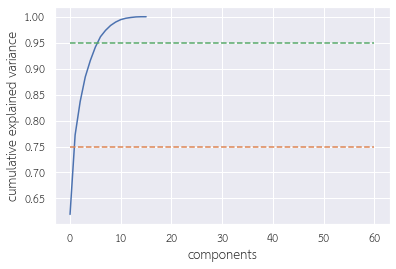

In [136]:
pca = PCA().fit(sk_scaled_X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.plot([0,60], [0.75,0.75], '--')
plt.plot([0,60], [0.95,0.95], '--')
plt.xlabel('components')
plt.ylabel('cumulative explained variance');

#### components = 2

In [137]:
# Select number of principal components and perform PCA
# From manual steps, we know that number of selected principal components should be 2.
# On the other hand, you can perform PCA multiple times with different numbers of principal components
# and check explained_variance_ratio_ afterward to find appropriate number of selected principal components

from sklearn.decomposition import PCA

num_components=2
pca2 = PCA(n_components=num_components)
pca2.fit(sk_scaled_X_train)

PCA(n_components=2)

In [138]:
# Show variances (or eigenvalues) of selected components

pca2.explained_variance_

array([19.81630227,  4.89556798])

In [139]:
# Show principal components (or eigenvectors) of selected components

pca2.components_

array([[ 0.21970226,  0.19230213,  0.22656364,  0.22970302,  0.21767238,
        -0.07726889,  0.22288685,  0.22072702,  0.08731576,  0.18226297,
         0.22261797,  0.17987384,  0.21851345,  0.1553589 ,  0.21612824,
         0.21784003,  0.22902648,  0.20109762,  0.22039291,  0.07746105,
         0.02766184,  0.05777974, -0.10134674,  0.22065907,  0.20561906,
         0.14495844, -0.21712048,  0.10059694, -0.14925376,  0.12936907],
       [ 0.02645679, -0.16313448, -0.03023206,  0.00933869, -0.09297971,
        -0.23769226, -0.07963393,  0.00975532, -0.27173608,  0.15229959,
        -0.05943987,  0.20080223, -0.08151106, -0.1042415 ,  0.03696136,
         0.12857371, -0.04867032,  0.0493216 ,  0.09532825,  0.41321471,
         0.29559485,  0.42176931,  0.38696144,  0.12757406, -0.18236983,
        -0.04918036, -0.09012684, -0.15261756,  0.1775352 ,  0.09634324]])

In [140]:
# Compare results from explained_variance_ and components_ from Scikit-learn
# to eig_paris from manual steps

eig_pairs

[(18.57778338157224,
  array([-0.21970226+0.j, -0.19230213+0.j, -0.22656364+0.j, -0.22970302+0.j,
         -0.21767238+0.j,  0.07726889+0.j, -0.22288685+0.j, -0.22072702+0.j,
         -0.08731576+0.j, -0.18226297+0.j, -0.22261797+0.j, -0.17987384+0.j,
         -0.21851345+0.j, -0.1553589 +0.j, -0.21612824+0.j, -0.21784003+0.j,
         -0.22902648+0.j, -0.20109762+0.j, -0.22039291+0.j, -0.07746105+0.j,
         -0.02766184+0.j, -0.05777974+0.j,  0.10134674+0.j, -0.22065907+0.j,
         -0.20561906+0.j, -0.14495844+0.j,  0.21712048+0.j, -0.10059694+0.j,
          0.14925376+0.j, -0.12936907+0.j])),
 (4.589594981740071,
  array([ 0.02645679+0.j, -0.16313448+0.j, -0.03023206+0.j,  0.00933869+0.j,
         -0.09297971+0.j, -0.23769226+0.j, -0.07963393+0.j,  0.00975532+0.j,
         -0.27173608+0.j,  0.15229959+0.j, -0.05943987+0.j,  0.20080223+0.j,
         -0.08151106+0.j, -0.1042415 +0.j,  0.03696136+0.j,  0.12857371+0.j,
         -0.04867032+0.j,  0.0493216 +0.j,  0.09532825+0.j,  0.41

In [141]:
# Show explained_variance_ratio_  (or percent of transformation along each component)

pca2.explained_variance_ratio_

array([0.61925945, 0.1529865 ])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

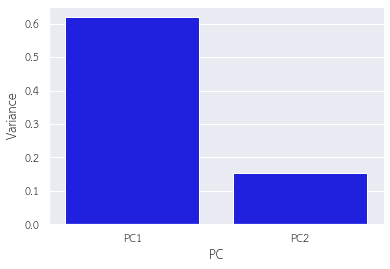

In [142]:
# Plot to see explained_variance_ratio_ using bar graph

temp_df = pd.DataFrame({'Variance':pca2.explained_variance_ratio_,
                        'PC':['PC1','PC2']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [143]:
# Transform input data of original matrix to the new space

sk_X_train_transformed  = pca2.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

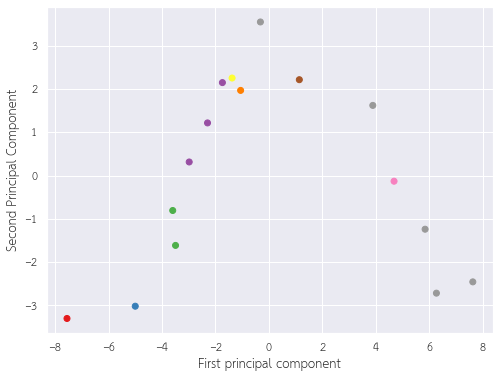

In [144]:
# Plot the new space with the transformed input data

plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [145]:
# The transformed data can also be converted back to the original data
# Since we use new space with lower dimension, 
# the derived X_train will not be the same as the original X_train

sk_derived_X_train = pca2.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[-3.77727504e-02,  2.03612267e-01,  3.92967911e-01,
        -4.36916887e-02,  3.10006590e-01,  7.76690658e-01,
         1.26695918e-01, -1.14244376e-01, -1.36889256e+00,
         5.00202286e-01,  1.95375665e-01, -7.59456825e-01,
        -1.76745370e-01,  2.35251238e-01, -2.24084194e-02,
        -2.35622604e-01,  5.96410769e-02,  1.07176361e-01,
         6.70795048e-02, -4.04411448e-03, -4.45830803e-01,
         4.98589495e-01,  8.90245492e-02, -1.21540601e-01,
         2.55499428e-02,  1.05411698e-01,  6.71821827e-02,
         2.80207351e-01, -4.76952856e-02, -9.42869182e-02],
       [ 4.77595389e-02, -8.58169163e-01, -3.61005153e-02,
         1.46357384e-01, -1.63746394e-01,  4.46811556e-01,
        -4.62612287e-01, -4.46874213e-01,  1.04097972e-01,
        -6.55500649e-01,  9.91634310e-02, -6.48953983e-01,
         7.13588425e-01, -1.19583080e-01,  3.33828425e-01,
         1.73682502e-01,  3.27131349e-02, -5.86606998e-01,
        -7.01152699e-02,  4.86071843e-02,  6.06735952e-

<AxesSubplot:>

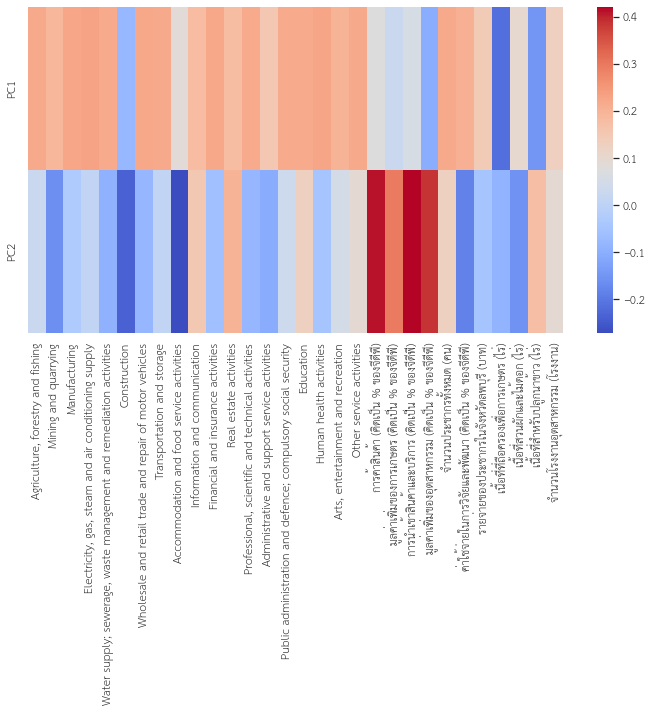

In [146]:
# Plot to see correlation between selected principal components and original variables

temp_df3 = pd.DataFrame(pca2.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

# The result shows that principal component 1 correlates with sepal length, petal width, petal length
# Principal component 2 correlates with petal width and petal length

#### components = 3

In [147]:
num_components=3
pca3 = PCA(n_components=num_components)
pca3.fit(sk_scaled_X_train)

PCA(n_components=3)

In [148]:
pca3.explained_variance_

array([19.81630227,  4.89556798,  2.06705715])

In [149]:
pca3.components_

array([[ 0.21970226,  0.19230213,  0.22656364,  0.22970302,  0.21767238,
        -0.07726889,  0.22288685,  0.22072702,  0.08731576,  0.18226297,
         0.22261797,  0.17987384,  0.21851345,  0.1553589 ,  0.21612824,
         0.21784003,  0.22902648,  0.20109762,  0.22039291,  0.07746105,
         0.02766184,  0.05777974, -0.10134674,  0.22065907,  0.20561906,
         0.14495844, -0.21712048,  0.10059694, -0.14925376,  0.12936907],
       [ 0.02645679, -0.16313448, -0.03023206,  0.00933869, -0.09297971,
        -0.23769226, -0.07963393,  0.00975532, -0.27173608,  0.15229959,
        -0.05943987,  0.20080223, -0.08151106, -0.1042415 ,  0.03696136,
         0.12857371, -0.04867032,  0.0493216 ,  0.09532825,  0.41321471,
         0.29559485,  0.42176931,  0.38696144,  0.12757406, -0.18236983,
        -0.04918036, -0.09012684, -0.15261756,  0.1775352 ,  0.09634324],
       [ 0.17042154, -0.13763707,  0.07953793,  0.05040797,  0.0553345 ,
         0.49478342, -0.10339659, -0.06263804, -0

In [150]:
eig_pairs

[(18.57778338157224,
  array([-0.21970226+0.j, -0.19230213+0.j, -0.22656364+0.j, -0.22970302+0.j,
         -0.21767238+0.j,  0.07726889+0.j, -0.22288685+0.j, -0.22072702+0.j,
         -0.08731576+0.j, -0.18226297+0.j, -0.22261797+0.j, -0.17987384+0.j,
         -0.21851345+0.j, -0.1553589 +0.j, -0.21612824+0.j, -0.21784003+0.j,
         -0.22902648+0.j, -0.20109762+0.j, -0.22039291+0.j, -0.07746105+0.j,
         -0.02766184+0.j, -0.05777974+0.j,  0.10134674+0.j, -0.22065907+0.j,
         -0.20561906+0.j, -0.14495844+0.j,  0.21712048+0.j, -0.10059694+0.j,
          0.14925376+0.j, -0.12936907+0.j])),
 (4.589594981740071,
  array([ 0.02645679+0.j, -0.16313448+0.j, -0.03023206+0.j,  0.00933869+0.j,
         -0.09297971+0.j, -0.23769226+0.j, -0.07963393+0.j,  0.00975532+0.j,
         -0.27173608+0.j,  0.15229959+0.j, -0.05943987+0.j,  0.20080223+0.j,
         -0.08151106+0.j, -0.1042415 +0.j,  0.03696136+0.j,  0.12857371+0.j,
         -0.04867032+0.j,  0.0493216 +0.j,  0.09532825+0.j,  0.41

In [151]:
pca3.explained_variance_ratio_

array([0.61925945, 0.1529865 , 0.06459554])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

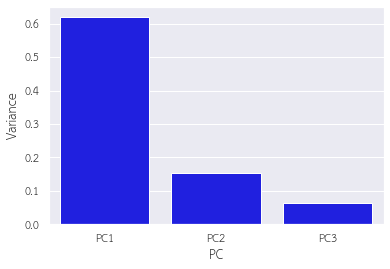

In [152]:
temp_df = pd.DataFrame({'Variance':pca3.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [153]:
sk_X_train_transformed  = pca3.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

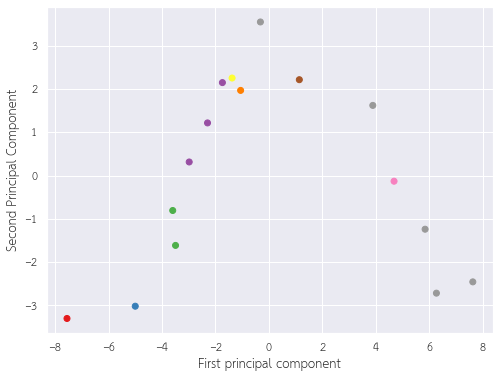

In [154]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [155]:
sk_derived_X_train = pca3.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[-9.57514386e-02,  2.50437433e-01,  3.65908509e-01,
        -6.08408572e-02,  2.91181378e-01,  6.08361625e-01,
         1.61872213e-01, -9.29344434e-02, -1.34842531e+00,
         4.91864346e-01,  1.67248383e-01, -6.87599355e-01,
        -2.13026738e-01,  3.38390973e-01, -7.55830692e-02,
        -2.51489922e-01,  4.33688047e-02,  1.24912752e-01,
         6.79791799e-02,  1.60590258e-02, -6.16744689e-01,
         4.71326725e-01,  1.09661459e-01, -1.06394885e-01,
         4.65441818e-02,  1.50525669e-01,  6.20964960e-02,
         3.25631761e-01,  9.75556531e-02, -8.74937132e-02],
       [-1.78621135e-01, -6.75337975e-01, -1.41755296e-01,
         7.93976018e-02, -2.37250370e-01, -2.10437530e-01,
        -3.25264694e-01, -3.63668519e-01,  1.84013394e-01,
        -6.88056551e-01, -1.06609434e-02, -3.68382911e-01,
         5.71926020e-01,  2.83131147e-01,  1.26205358e-01,
         1.11727768e-01, -3.08227618e-02, -5.17354379e-01,
        -6.66024438e-02,  1.27100896e-01, -6.06058245e-

<AxesSubplot:>

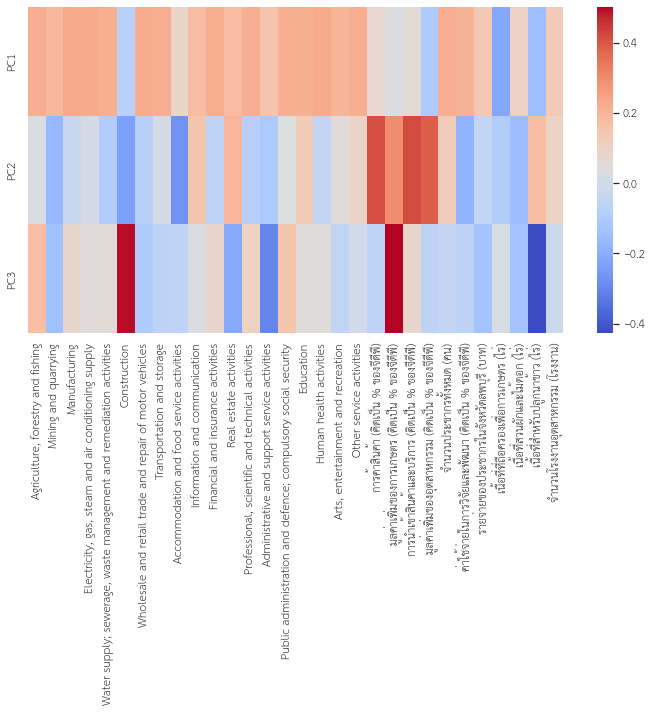

In [156]:
temp_df3 = pd.DataFrame(pca3.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

#### components = 4

In [157]:
num_components=4
pca4 = PCA(n_components=num_components)
pca4.fit(sk_scaled_X_train)

PCA(n_components=4)

In [158]:
pca4.explained_variance_

array([19.81630227,  4.89556798,  2.06705715,  1.51117861])

In [159]:
pca4.components_

array([[ 0.21970226,  0.19230213,  0.22656364,  0.22970302,  0.21767238,
        -0.07726889,  0.22288685,  0.22072702,  0.08731576,  0.18226297,
         0.22261797,  0.17987384,  0.21851345,  0.1553589 ,  0.21612824,
         0.21784003,  0.22902648,  0.20109762,  0.22039291,  0.07746105,
         0.02766184,  0.05777974, -0.10134674,  0.22065907,  0.20561906,
         0.14495844, -0.21712048,  0.10059694, -0.14925376,  0.12936907],
       [ 0.02645679, -0.16313448, -0.03023206,  0.00933869, -0.09297971,
        -0.23769226, -0.07963393,  0.00975532, -0.27173608,  0.15229959,
        -0.05943987,  0.20080223, -0.08151106, -0.1042415 ,  0.03696136,
         0.12857371, -0.04867032,  0.0493216 ,  0.09532825,  0.41321471,
         0.29559485,  0.42176931,  0.38696144,  0.12757406, -0.18236983,
        -0.04918036, -0.09012684, -0.15261756,  0.1775352 ,  0.09634324],
       [ 0.17042154, -0.13763707,  0.07953793,  0.05040797,  0.0553345 ,
         0.49478342, -0.10339659, -0.06263804, -0

In [160]:
eig_pairs

[(18.57778338157224,
  array([-0.21970226+0.j, -0.19230213+0.j, -0.22656364+0.j, -0.22970302+0.j,
         -0.21767238+0.j,  0.07726889+0.j, -0.22288685+0.j, -0.22072702+0.j,
         -0.08731576+0.j, -0.18226297+0.j, -0.22261797+0.j, -0.17987384+0.j,
         -0.21851345+0.j, -0.1553589 +0.j, -0.21612824+0.j, -0.21784003+0.j,
         -0.22902648+0.j, -0.20109762+0.j, -0.22039291+0.j, -0.07746105+0.j,
         -0.02766184+0.j, -0.05777974+0.j,  0.10134674+0.j, -0.22065907+0.j,
         -0.20561906+0.j, -0.14495844+0.j,  0.21712048+0.j, -0.10059694+0.j,
          0.14925376+0.j, -0.12936907+0.j])),
 (4.589594981740071,
  array([ 0.02645679+0.j, -0.16313448+0.j, -0.03023206+0.j,  0.00933869+0.j,
         -0.09297971+0.j, -0.23769226+0.j, -0.07963393+0.j,  0.00975532+0.j,
         -0.27173608+0.j,  0.15229959+0.j, -0.05943987+0.j,  0.20080223+0.j,
         -0.08151106+0.j, -0.1042415 +0.j,  0.03696136+0.j,  0.12857371+0.j,
         -0.04867032+0.j,  0.0493216 +0.j,  0.09532825+0.j,  0.41

In [161]:
pca4.explained_variance_ratio_

array([0.61925945, 0.1529865 , 0.06459554, 0.04722433])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

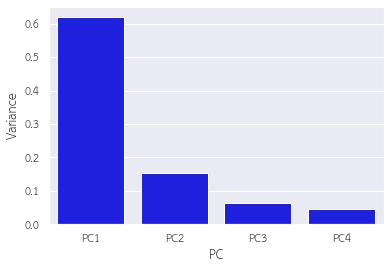

In [162]:
temp_df = pd.DataFrame({'Variance':pca4.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [163]:
sk_X_train_transformed  = pca4.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

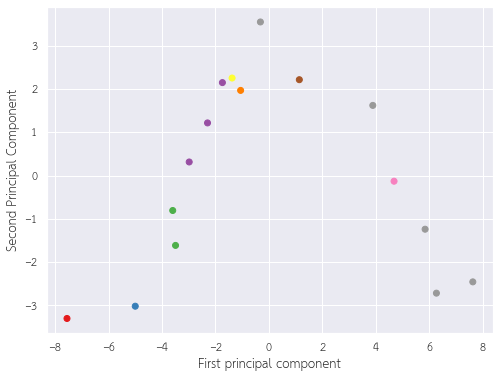

In [164]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [165]:
sk_derived_X_train = pca4.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[-9.48961898e-02,  2.90311023e-01,  3.61160860e-01,
        -5.79850292e-02,  2.95940457e-01,  5.86847438e-01,
         1.90272309e-01, -9.00389439e-02, -1.28998529e+00,
         5.83399103e-01,  1.45035111e-01, -6.26355387e-01,
        -2.58345218e-01,  3.72928677e-01, -5.65458851e-02,
        -2.69397291e-01,  3.80699858e-02,  1.74453017e-01,
         5.02577159e-02,  3.59924067e-02, -5.96672960e-01,
         4.73004257e-01,  6.52078345e-02, -1.00391442e-01,
         9.39179994e-02,  3.17702680e-02,  9.15493052e-02,
         1.86489948e-01,  8.91047266e-02, -2.95443240e-01],
       [-1.72532566e-01, -3.91475392e-01, -1.75554106e-01,
         9.97284194e-02, -2.03370191e-01, -3.63598371e-01,
        -1.23082631e-01, -3.43055278e-01,  6.00051519e-01,
        -3.64148915e-02, -1.68798612e-01,  6.76167196e-02,
         2.49300925e-01,  5.29007221e-01,  2.61732261e-01,
        -1.57559087e-02, -6.85453846e-02, -1.64674132e-01,
        -1.92762653e-01,  2.69007880e-01,  8.22860717e-

<AxesSubplot:>

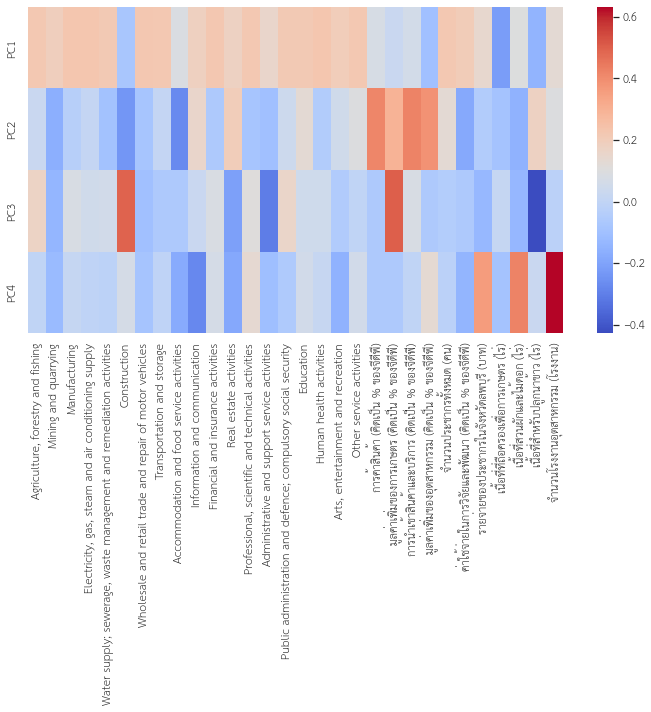

In [166]:
temp_df3 = pd.DataFrame(pca4.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3", 3:"PC4"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

#### components = 5

In [167]:
num_components=5
pca5 = PCA(n_components=num_components)
pca5.fit(sk_scaled_X_train)

PCA(n_components=5)

In [168]:
pca5.explained_variance_

array([19.81630227,  4.89556798,  2.06705715,  1.51117861,  1.01375073])

In [169]:
pca5.components_

array([[ 0.21970226,  0.19230213,  0.22656364,  0.22970302,  0.21767238,
        -0.07726889,  0.22288685,  0.22072702,  0.08731576,  0.18226297,
         0.22261797,  0.17987384,  0.21851345,  0.1553589 ,  0.21612824,
         0.21784003,  0.22902648,  0.20109762,  0.22039291,  0.07746105,
         0.02766184,  0.05777974, -0.10134674,  0.22065907,  0.20561906,
         0.14495844, -0.21712048,  0.10059694, -0.14925376,  0.12936907],
       [ 0.02645679, -0.16313448, -0.03023206,  0.00933869, -0.09297971,
        -0.23769226, -0.07963393,  0.00975532, -0.27173608,  0.15229959,
        -0.05943987,  0.20080223, -0.08151106, -0.1042415 ,  0.03696136,
         0.12857371, -0.04867032,  0.0493216 ,  0.09532825,  0.41321471,
         0.29559485,  0.42176931,  0.38696144,  0.12757406, -0.18236983,
        -0.04918036, -0.09012684, -0.15261756,  0.1775352 ,  0.09634324],
       [ 0.17042154, -0.13763707,  0.07953793,  0.05040797,  0.0553345 ,
         0.49478342, -0.10339659, -0.06263804, -0

In [170]:
eig_pairs

[(18.57778338157224,
  array([-0.21970226+0.j, -0.19230213+0.j, -0.22656364+0.j, -0.22970302+0.j,
         -0.21767238+0.j,  0.07726889+0.j, -0.22288685+0.j, -0.22072702+0.j,
         -0.08731576+0.j, -0.18226297+0.j, -0.22261797+0.j, -0.17987384+0.j,
         -0.21851345+0.j, -0.1553589 +0.j, -0.21612824+0.j, -0.21784003+0.j,
         -0.22902648+0.j, -0.20109762+0.j, -0.22039291+0.j, -0.07746105+0.j,
         -0.02766184+0.j, -0.05777974+0.j,  0.10134674+0.j, -0.22065907+0.j,
         -0.20561906+0.j, -0.14495844+0.j,  0.21712048+0.j, -0.10059694+0.j,
          0.14925376+0.j, -0.12936907+0.j])),
 (4.589594981740071,
  array([ 0.02645679+0.j, -0.16313448+0.j, -0.03023206+0.j,  0.00933869+0.j,
         -0.09297971+0.j, -0.23769226+0.j, -0.07963393+0.j,  0.00975532+0.j,
         -0.27173608+0.j,  0.15229959+0.j, -0.05943987+0.j,  0.20080223+0.j,
         -0.08151106+0.j, -0.1042415 +0.j,  0.03696136+0.j,  0.12857371+0.j,
         -0.04867032+0.j,  0.0493216 +0.j,  0.09532825+0.j,  0.41

In [171]:
pca5.explained_variance_ratio_

array([0.61925945, 0.1529865 , 0.06459554, 0.04722433, 0.03167971])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

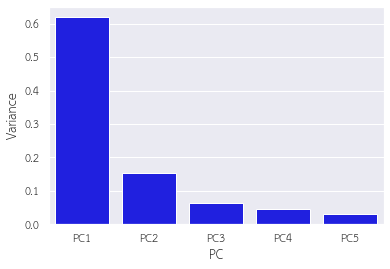

In [172]:
temp_df = pd.DataFrame({'Variance':pca5.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3','PC4','PC5']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [173]:
sk_X_train_transformed  = pca5.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

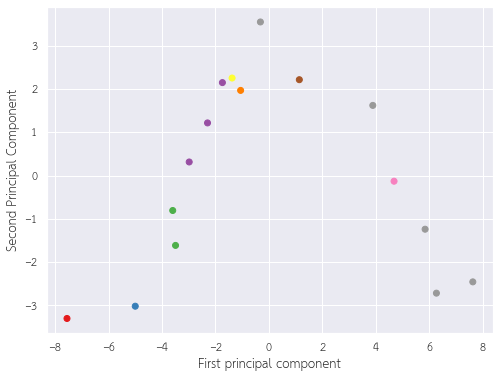

In [174]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [175]:
sk_derived_X_train = pca5.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[-0.06891805, -0.11408965,  0.18480653, -0.02559526,  0.3137489 ,
         0.33527027,  0.04389376, -0.29815107, -0.44304879,  0.60236156,
        -0.04922296, -0.50772043, -0.08918052,  0.69769168,  0.10073868,
        -0.30572816, -0.01141573, -0.15835589, -0.09730113,  0.22761219,
        -0.35917448,  0.47117886, -0.2124006 , -0.0503821 , -0.04820416,
         0.23903718,  0.05119722, -0.10799499, -0.01838087,  0.0533602 ],
       [-0.19362009, -0.06320675, -0.03240005,  0.07343631, -0.21782604,
        -0.15938285, -0.00426115, -0.17412212, -0.08744163, -0.0518075 ,
        -0.01111135, -0.02868415,  0.11198299,  0.26538375,  0.13405792,
         0.01373535, -0.0283758 ,  0.10548053, -0.07298308,  0.11346223,
        -0.1105012 , -0.00260322,  0.0610033 ,  0.14947749, -0.14939651,
        -0.3512226 ,  0.02027073,  0.33964678, -0.48812952, -0.04102438],
       [-0.16996952, -0.11403482,  0.00307079,  0.09492033, -0.10536622,
        -0.2770237 ,  0.03466647, -0.08234329,  0

<AxesSubplot:>

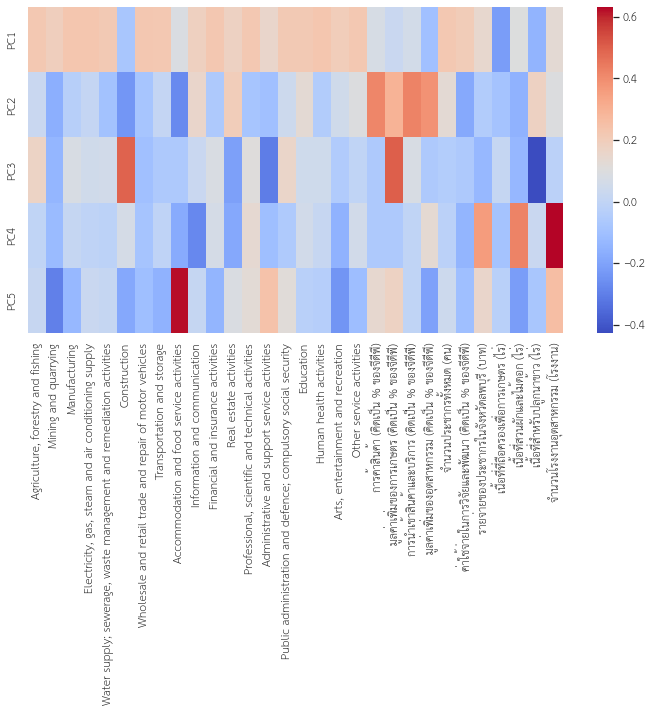

In [176]:
temp_df3 = pd.DataFrame(pca5.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3", 3:"PC4", 4:"PC5"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

#### components = 6

In [177]:
num_components=6
pca6 = PCA(n_components=num_components)
pca6.fit(sk_scaled_X_train)

PCA(n_components=6)

In [178]:
pca6.explained_variance_

array([19.81630227,  4.89556798,  2.06705715,  1.51117861,  1.01375073,
        0.83274851])

In [179]:
pca6.components_

array([[ 0.21970226,  0.19230213,  0.22656364,  0.22970302,  0.21767238,
        -0.07726889,  0.22288685,  0.22072702,  0.08731576,  0.18226297,
         0.22261797,  0.17987384,  0.21851345,  0.1553589 ,  0.21612824,
         0.21784003,  0.22902648,  0.20109762,  0.22039291,  0.07746105,
         0.02766184,  0.05777974, -0.10134674,  0.22065907,  0.20561906,
         0.14495844, -0.21712048,  0.10059694, -0.14925376,  0.12936907],
       [ 0.02645679, -0.16313448, -0.03023206,  0.00933869, -0.09297971,
        -0.23769226, -0.07963393,  0.00975532, -0.27173608,  0.15229959,
        -0.05943987,  0.20080223, -0.08151106, -0.1042415 ,  0.03696136,
         0.12857371, -0.04867032,  0.0493216 ,  0.09532825,  0.41321471,
         0.29559485,  0.42176931,  0.38696144,  0.12757406, -0.18236983,
        -0.04918036, -0.09012684, -0.15261756,  0.1775352 ,  0.09634324],
       [ 0.17042154, -0.13763707,  0.07953793,  0.05040797,  0.0553345 ,
         0.49478342, -0.10339659, -0.06263804, -0

In [180]:
eig_pairs

[(18.57778338157224,
  array([-0.21970226+0.j, -0.19230213+0.j, -0.22656364+0.j, -0.22970302+0.j,
         -0.21767238+0.j,  0.07726889+0.j, -0.22288685+0.j, -0.22072702+0.j,
         -0.08731576+0.j, -0.18226297+0.j, -0.22261797+0.j, -0.17987384+0.j,
         -0.21851345+0.j, -0.1553589 +0.j, -0.21612824+0.j, -0.21784003+0.j,
         -0.22902648+0.j, -0.20109762+0.j, -0.22039291+0.j, -0.07746105+0.j,
         -0.02766184+0.j, -0.05777974+0.j,  0.10134674+0.j, -0.22065907+0.j,
         -0.20561906+0.j, -0.14495844+0.j,  0.21712048+0.j, -0.10059694+0.j,
          0.14925376+0.j, -0.12936907+0.j])),
 (4.589594981740071,
  array([ 0.02645679+0.j, -0.16313448+0.j, -0.03023206+0.j,  0.00933869+0.j,
         -0.09297971+0.j, -0.23769226+0.j, -0.07963393+0.j,  0.00975532+0.j,
         -0.27173608+0.j,  0.15229959+0.j, -0.05943987+0.j,  0.20080223+0.j,
         -0.08151106+0.j, -0.1042415 +0.j,  0.03696136+0.j,  0.12857371+0.j,
         -0.04867032+0.j,  0.0493216 +0.j,  0.09532825+0.j,  0.41

In [181]:
pca6.explained_variance_ratio_

array([0.61925945, 0.1529865 , 0.06459554, 0.04722433, 0.03167971,
       0.02602339])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

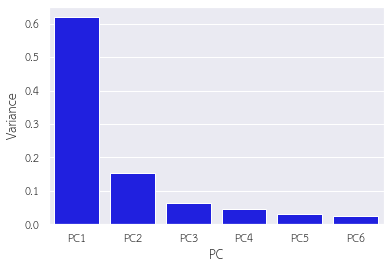

In [182]:
temp_df = pd.DataFrame({'Variance':pca6.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3','PC4','PC5','PC6']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [183]:
sk_X_train_transformed  = pca6.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

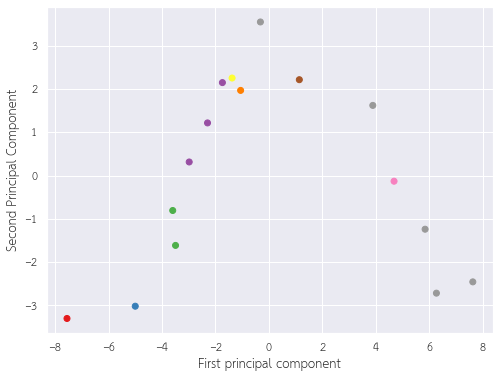

In [184]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [185]:
sk_derived_X_train = pca6.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[-4.94721805e-02, -1.24849622e-01,  1.67437658e-01,
        -2.09466873e-02,  2.89067843e-01,  2.75409486e-01,
         3.46421828e-02, -2.97884017e-01, -3.87906002e-01,
         5.67256014e-01, -4.25554762e-02, -5.35822916e-01,
        -6.76868239e-02,  7.47097014e-01,  8.03796283e-02,
        -2.75143859e-01, -5.07630685e-04, -2.03691666e-01,
        -8.42126676e-02,  2.69349810e-01, -3.37745145e-01,
         4.85371687e-01, -1.87705205e-01, -2.79538326e-02,
        -6.67269696e-02,  3.89400394e-02,  5.45719366e-02,
         8.43225740e-02, -7.93280729e-02,  1.99672372e-02],
       [-2.30484857e-01, -4.28083977e-02,  5.27220196e-04,
         6.46237212e-02, -1.71036593e-01, -4.59009802e-02,
         1.32776550e-02, -1.74628382e-01, -1.91979304e-01,
         1.47443039e-02, -2.37513258e-02,  2.45915072e-02,
         7.12360359e-02,  1.71722942e-01,  1.72653857e-01,
        -4.42452452e-02, -4.90549688e-02,  1.91426428e-01,
        -9.77957002e-02,  3.43375887e-02, -1.51126141e-

<AxesSubplot:>

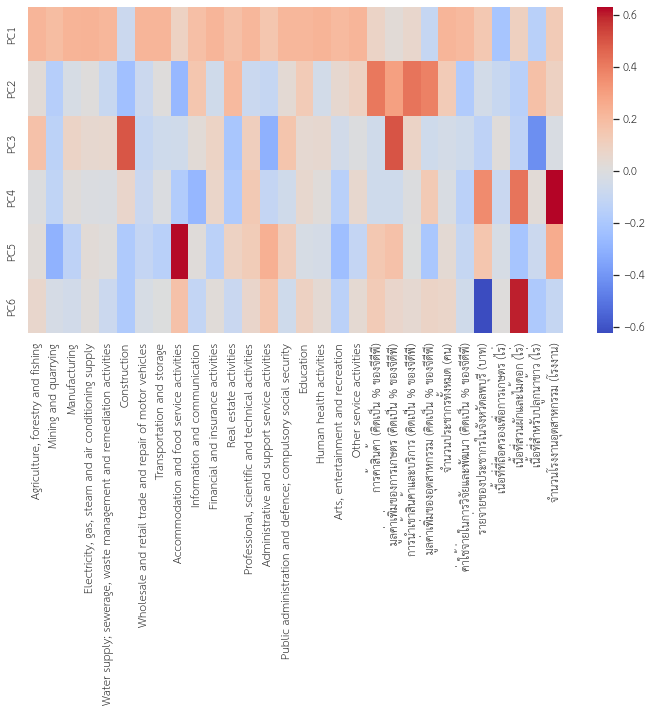

In [186]:
temp_df3 = pd.DataFrame(pca6.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3", 3:"PC4", 4:"PC5", 5:"PC6"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

#### components = 7

In [187]:
num_components=7
pca7 = PCA(n_components=num_components)
pca7.fit(sk_scaled_X_train)

PCA(n_components=7)

In [188]:
pca7.explained_variance_

array([19.81630227,  4.89556798,  2.06705715,  1.51117861,  1.01375073,
        0.83274851,  0.6335128 ])

In [189]:
pca7.components_

array([[ 0.21970226,  0.19230213,  0.22656364,  0.22970302,  0.21767238,
        -0.07726889,  0.22288685,  0.22072702,  0.08731576,  0.18226297,
         0.22261797,  0.17987384,  0.21851345,  0.1553589 ,  0.21612824,
         0.21784003,  0.22902648,  0.20109762,  0.22039291,  0.07746105,
         0.02766184,  0.05777974, -0.10134674,  0.22065907,  0.20561906,
         0.14495844, -0.21712048,  0.10059694, -0.14925376,  0.12936907],
       [ 0.02645679, -0.16313448, -0.03023206,  0.00933869, -0.09297971,
        -0.23769226, -0.07963393,  0.00975532, -0.27173608,  0.15229959,
        -0.05943987,  0.20080223, -0.08151106, -0.1042415 ,  0.03696136,
         0.12857371, -0.04867032,  0.0493216 ,  0.09532825,  0.41321471,
         0.29559485,  0.42176931,  0.38696144,  0.12757406, -0.18236983,
        -0.04918036, -0.09012684, -0.15261756,  0.1775352 ,  0.09634324],
       [ 0.17042154, -0.13763707,  0.07953793,  0.05040797,  0.0553345 ,
         0.49478342, -0.10339659, -0.06263804, -0

In [190]:
pca7.explained_variance_ratio_

array([0.61925945, 0.1529865 , 0.06459554, 0.04722433, 0.03167971,
       0.02602339, 0.01979728])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

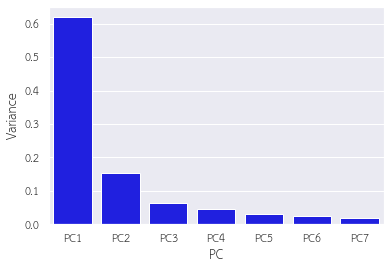

In [191]:
temp_df = pd.DataFrame({'Variance':pca7.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [192]:
sk_X_train_transformed  = pca7.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

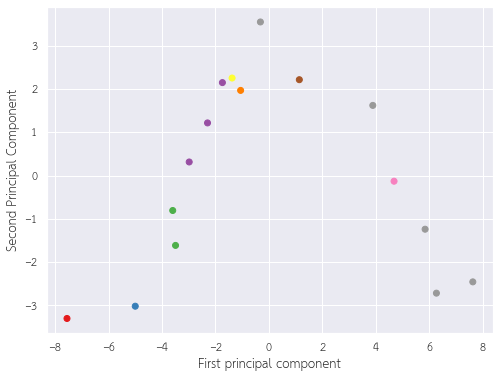

In [193]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [194]:
sk_derived_X_train = pca7.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[ 1.24737254e-01, -2.91418302e-02,  1.04651339e-01,
        -6.36599708e-02,  1.85740716e-01,  1.60968646e-01,
         9.03749020e-03, -5.95841123e-02, -3.50170670e-01,
         2.36204557e-01,  9.42758854e-02, -4.37577614e-01,
        -9.02746441e-02,  6.74268518e-01,  1.01715122e-01,
        -1.61597859e-01,  7.28648805e-02, -4.89022175e-01,
         1.12344109e-01,  3.43805643e-02, -2.21045230e-01,
         2.43239683e-01, -5.79288019e-02, -5.52418818e-02,
        -7.71093782e-02, -1.43478214e-01, -1.96296671e-01,
        -2.13448769e-01,  7.97109731e-02,  4.41018659e-02],
       [-1.73593244e-01, -1.15530831e-02, -1.99769219e-02,
         5.06748348e-02, -2.04780156e-01, -8.32739507e-02,
         4.91592490e-03, -9.68067292e-02, -1.79656068e-01,
        -9.33672436e-02,  2.09337221e-02,  5.66754974e-02,
         6.38595265e-02,  1.47939324e-01,  1.79621394e-01,
        -7.16450293e-03, -2.50936916e-02,  9.82459806e-02,
        -3.36061102e-02, -4.23963696e-02, -1.13015424e-

<AxesSubplot:>

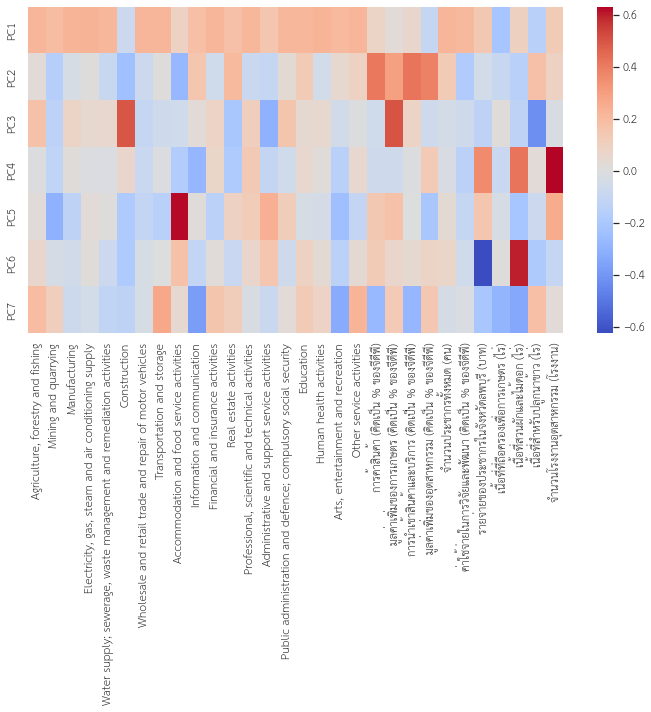

In [195]:
temp_df3 = pd.DataFrame(pca7.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3", 3:"PC4", 4:"PC5", 5:"PC6", 6:"PC7"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

#### components = 8

In [196]:
num_components=8
pca8 = PCA(n_components=num_components)
pca8.fit(sk_scaled_X_train)

PCA(n_components=8)

In [197]:
pca8.explained_variance_

array([19.81630227,  4.89556798,  2.06705715,  1.51117861,  1.01375073,
        0.83274851,  0.6335128 ,  0.39132292])

In [198]:
pca8.components_

array([[ 2.19702264e-01,  1.92302130e-01,  2.26563642e-01,
         2.29703015e-01,  2.17672382e-01, -7.72688907e-02,
         2.22886848e-01,  2.20727015e-01,  8.73157638e-02,
         1.82262965e-01,  2.22617973e-01,  1.79873844e-01,
         2.18513454e-01,  1.55358904e-01,  2.16128242e-01,
         2.17840034e-01,  2.29026478e-01,  2.01097623e-01,
         2.20392906e-01,  7.74610472e-02,  2.76618427e-02,
         5.77797399e-02, -1.01346737e-01,  2.20659074e-01,
         2.05619057e-01,  1.44958441e-01, -2.17120485e-01,
         1.00596940e-01, -1.49253757e-01,  1.29369070e-01],
       [ 2.64567876e-02, -1.63134476e-01, -3.02320634e-02,
         9.33869313e-03, -9.29797147e-02, -2.37692261e-01,
        -7.96339283e-02,  9.75532244e-03, -2.71736076e-01,
         1.52299594e-01, -5.94398709e-02,  2.00802229e-01,
        -8.15110596e-02, -1.04241502e-01,  3.69613618e-02,
         1.28573709e-01, -4.86703217e-02,  4.93216029e-02,
         9.53282524e-02,  4.13214709e-01,  2.95594851e-

In [199]:
pca8.explained_variance_ratio_

array([0.61925945, 0.1529865 , 0.06459554, 0.04722433, 0.03167971,
       0.02602339, 0.01979728, 0.01222884])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

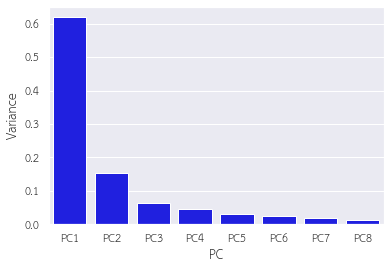

In [200]:
temp_df = pd.DataFrame({'Variance':pca8.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [201]:
sk_X_train_transformed  = pca8.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

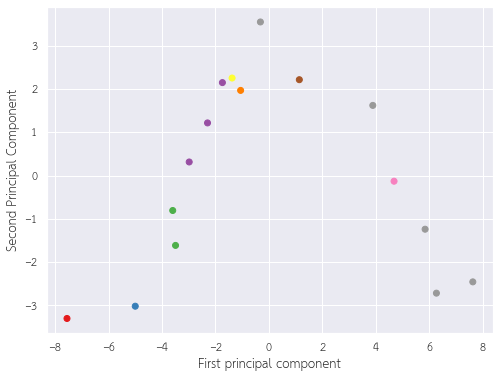

In [202]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [203]:
sk_derived_X_train = pca8.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[ 1.25325827e-01,  6.70446098e-02,  7.10342603e-02,
        -5.98084004e-02,  1.56011013e-01, -4.51649557e-02,
         2.30740217e-02, -3.96138079e-02, -2.09518310e-01,
         4.50209263e-01,  7.49818094e-03, -3.02847627e-01,
        -1.30872378e-01,  1.03601996e-01, -5.75997824e-04,
        -1.61343024e-01,  6.56616657e-02, -5.52988532e-01,
         1.23987853e-01,  1.49916754e-02, -1.17947506e-01,
         9.75749662e-02, -1.78827144e-01,  1.34331629e-02,
         2.45472010e-02, -1.06700267e-01, -1.02762780e-01,
        -5.82315277e-02,  1.00197421e-01,  1.02977022e-01],
       [-1.73424343e-01,  1.60491949e-02, -2.96238945e-02,
         5.17801062e-02, -2.13311582e-01, -1.42427372e-01,
         8.94393803e-03, -9.10759225e-02, -1.39293565e-01,
        -3.19550800e-02, -3.96856472e-03,  9.53384789e-02,
         5.22093403e-02, -1.58228028e-02,  1.50267278e-01,
        -7.09137378e-03, -2.71607723e-02,  7.98897844e-02,
        -3.02647469e-02, -4.79603295e-02, -8.34298399e-

<AxesSubplot:>

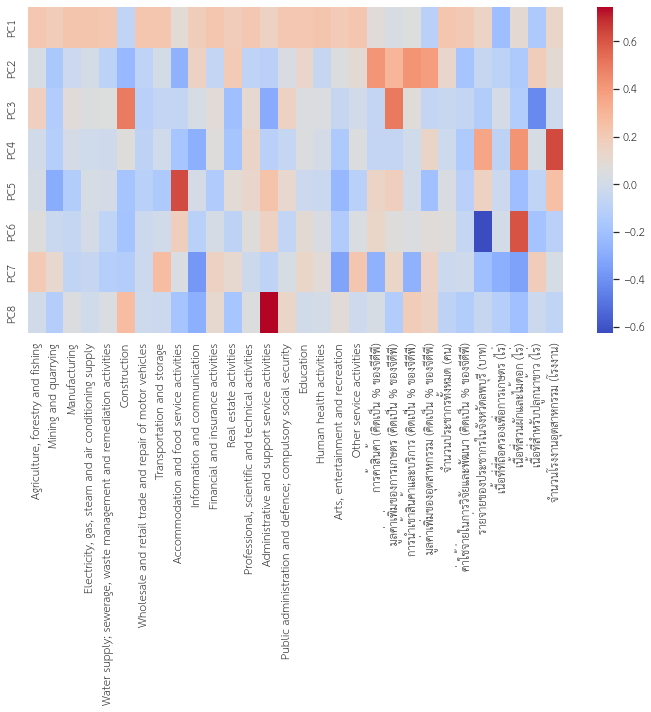

In [204]:
temp_df3 = pd.DataFrame(pca8.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3", 3:"PC4", 4:"PC5", 5:"PC6", 6:"PC7", 7:"PC8"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

#### components = 9

In [205]:
num_components=9
pca9 = PCA(n_components=num_components)
pca9.fit(sk_scaled_X_train)

PCA(n_components=9)

In [206]:
pca9.explained_variance_

array([19.81630227,  4.89556798,  2.06705715,  1.51117861,  1.01375073,
        0.83274851,  0.6335128 ,  0.39132292,  0.3026821 ])

In [207]:
pca9.components_

array([[ 2.19702264e-01,  1.92302130e-01,  2.26563642e-01,
         2.29703015e-01,  2.17672382e-01, -7.72688907e-02,
         2.22886848e-01,  2.20727015e-01,  8.73157638e-02,
         1.82262965e-01,  2.22617973e-01,  1.79873844e-01,
         2.18513454e-01,  1.55358904e-01,  2.16128242e-01,
         2.17840034e-01,  2.29026478e-01,  2.01097623e-01,
         2.20392906e-01,  7.74610472e-02,  2.76618427e-02,
         5.77797399e-02, -1.01346737e-01,  2.20659074e-01,
         2.05619057e-01,  1.44958441e-01, -2.17120485e-01,
         1.00596940e-01, -1.49253757e-01,  1.29369070e-01],
       [ 2.64567876e-02, -1.63134476e-01, -3.02320634e-02,
         9.33869313e-03, -9.29797147e-02, -2.37692261e-01,
        -7.96339283e-02,  9.75532244e-03, -2.71736076e-01,
         1.52299594e-01, -5.94398709e-02,  2.00802229e-01,
        -8.15110596e-02, -1.04241502e-01,  3.69613618e-02,
         1.28573709e-01, -4.86703217e-02,  4.93216029e-02,
         9.53282524e-02,  4.13214709e-01,  2.95594851e-

In [208]:
pca9.explained_variance_ratio_

array([0.61925945, 0.1529865 , 0.06459554, 0.04722433, 0.03167971,
       0.02602339, 0.01979728, 0.01222884, 0.00945882])

<AxesSubplot:xlabel='PC', ylabel='Variance'>

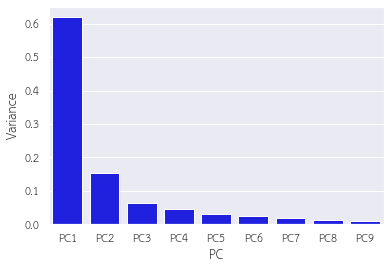

In [209]:
temp_df = pd.DataFrame({'Variance':pca9.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [210]:
sk_X_train_transformed  = pca9.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

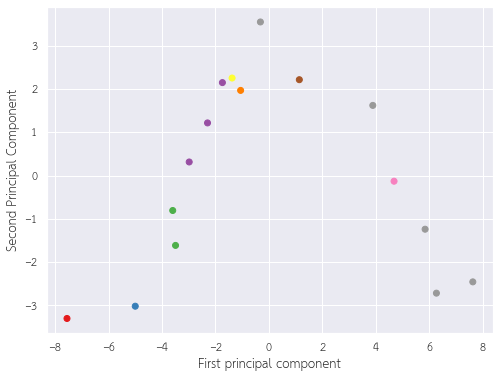

In [211]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [212]:
sk_derived_X_train = pca9.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[ 1.36499146e-01,  1.42998519e-01,  3.89520146e-02,
        -8.78516751e-02,  8.84104276e-02,  5.69496667e-02,
         1.17800584e-02, -2.33420537e-04, -1.08598353e-01,
         4.25117983e-01,  3.00061277e-02, -2.81438328e-01,
        -1.74558527e-01,  1.25203929e-01, -9.27281355e-02,
        -1.15993656e-01,  7.48767703e-02, -5.45795821e-01,
         1.50061601e-01,  5.66238117e-02, -7.87538396e-02,
         1.55425538e-01, -1.46095329e-01,  2.25031056e-03,
         5.20495451e-02, -4.08625613e-02, -6.82765288e-02,
        -3.22315075e-02,  1.17828999e-01,  8.24282389e-02],
       [-1.62845501e-01,  8.79619700e-02, -5.99992015e-02,
         2.52288763e-02, -2.77315472e-01, -4.57457666e-02,
        -1.74912891e-03, -5.37907721e-02, -4.37430631e-02,
        -5.57113764e-02,  1.73418448e-02,  1.15608694e-01,
         1.08475168e-02,  4.62979785e-03,  6.30181030e-02,
         3.58451769e-02, -1.84359582e-02,  8.66998069e-02,
        -5.57825415e-03, -8.54323471e-03, -4.63214763e-

<AxesSubplot:>

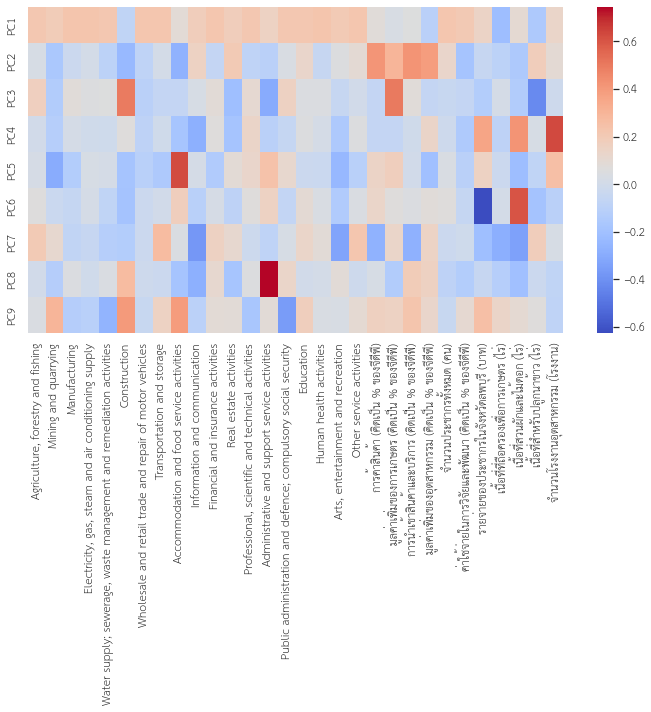

In [213]:
temp_df3 = pd.DataFrame(pca9.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3", 3:"PC4", 4:"PC5", 5:"PC6", 6:"PC7", 7:"PC8", 8:"PC9"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

#### components = 10

In [214]:
num_components=10
pca10 = PCA(n_components=num_components)
pca10.fit(sk_scaled_X_train)

PCA(n_components=10)

In [215]:
pca10.explained_variance_

array([19.81630227,  4.89556798,  2.06705715,  1.51117861,  1.01375073,
        0.83274851,  0.6335128 ,  0.39132292,  0.3026821 ,  0.20990658])

In [216]:
pca10.components_

array([[ 2.19702264e-01,  1.92302130e-01,  2.26563642e-01,
         2.29703015e-01,  2.17672382e-01, -7.72688907e-02,
         2.22886848e-01,  2.20727015e-01,  8.73157638e-02,
         1.82262965e-01,  2.22617973e-01,  1.79873844e-01,
         2.18513454e-01,  1.55358904e-01,  2.16128242e-01,
         2.17840034e-01,  2.29026478e-01,  2.01097623e-01,
         2.20392906e-01,  7.74610472e-02,  2.76618427e-02,
         5.77797399e-02, -1.01346737e-01,  2.20659074e-01,
         2.05619057e-01,  1.44958441e-01, -2.17120485e-01,
         1.00596940e-01, -1.49253757e-01,  1.29369070e-01],
       [ 2.64567876e-02, -1.63134476e-01, -3.02320634e-02,
         9.33869313e-03, -9.29797147e-02, -2.37692261e-01,
        -7.96339283e-02,  9.75532244e-03, -2.71736076e-01,
         1.52299594e-01, -5.94398709e-02,  2.00802229e-01,
        -8.15110596e-02, -1.04241502e-01,  3.69613618e-02,
         1.28573709e-01, -4.86703217e-02,  4.93216029e-02,
         9.53282524e-02,  4.13214709e-01,  2.95594851e-

In [217]:
pca10.explained_variance_ratio_

array([0.61925945, 0.1529865 , 0.06459554, 0.04722433, 0.03167971,
       0.02602339, 0.01979728, 0.01222884, 0.00945882, 0.00655958])

In [218]:
np.sum(pca10.explained_variance_ratio_)

0.9898134266105539

<AxesSubplot:xlabel='PC', ylabel='Variance'>

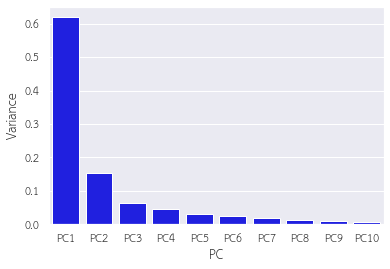

In [219]:
temp_df = pd.DataFrame({'Variance':pca10.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [220]:
sk_X_train_transformed  = pca10.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

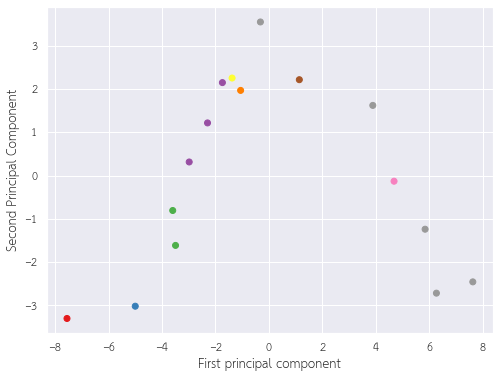

In [221]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [222]:
sk_derived_X_train = pca10.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[ 0.03326666,  0.10443815,  0.04223242, -0.01235039, -0.08902022,
         0.04872724,  0.00607218,  0.01602311, -0.1843673 ,  0.431001  ,
         0.01726484, -0.10194179, -0.13920306,  0.22423335, -0.10388231,
        -0.10217265,  0.06320648, -0.48608496,  0.10225989, -0.02489576,
         0.03189072, -0.02188329, -0.05527297,  0.06507676,  0.03726793,
         0.01482793,  0.01384913, -0.00567041, -0.01932758,  0.08055337],
       [-0.07931647,  0.11916252, -0.0626535 , -0.03586186, -0.1337501 ,
        -0.03909271,  0.00286932, -0.06694451,  0.01756426, -0.06047153,
         0.02765127, -0.02962826, -0.01775984, -0.07549839,  0.07204334,
         0.02466212, -0.00899311,  0.03838566,  0.03309979,  0.05741711,
        -0.13584788,  0.04785599, -0.02062322,  0.05633182, -0.0505008 ,
        -0.00363046, -0.07501141, -0.07451773, -0.18710002,  0.02911916],
       [-0.02147149, -0.01428881, -0.01325879, -0.02252602, -0.02964975,
         0.01229585,  0.01833285,  0.04739603,  0

<AxesSubplot:>

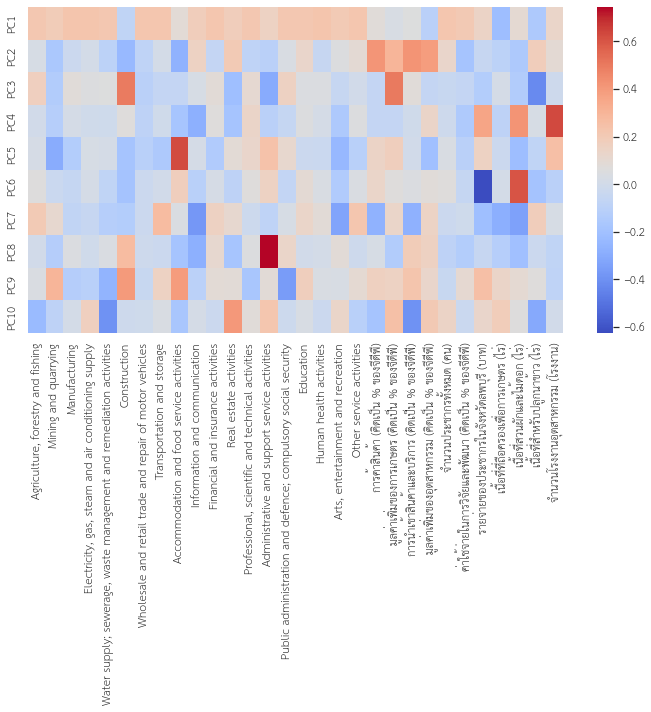

In [223]:
temp_df3 = pd.DataFrame(pca10.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3", 3:"PC4", 4:"PC5", 5:"PC6", 6:"PC7", 7:"PC8", 8:"PC9", 9:"PC10"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')

#### components = 11

In [224]:
num_components=11
pca11 = PCA(n_components=num_components)
pca11.fit(sk_scaled_X_train)

PCA(n_components=11)

In [225]:
pca11.explained_variance_

array([19.81630227,  4.89556798,  2.06705715,  1.51117861,  1.01375073,
        0.83274851,  0.6335128 ,  0.39132292,  0.3026821 ,  0.20990658,
        0.14981969])

In [226]:
pca11.components_

array([[ 2.19702264e-01,  1.92302130e-01,  2.26563642e-01,
         2.29703015e-01,  2.17672382e-01, -7.72688907e-02,
         2.22886848e-01,  2.20727015e-01,  8.73157638e-02,
         1.82262965e-01,  2.22617973e-01,  1.79873844e-01,
         2.18513454e-01,  1.55358904e-01,  2.16128242e-01,
         2.17840034e-01,  2.29026478e-01,  2.01097623e-01,
         2.20392906e-01,  7.74610472e-02,  2.76618427e-02,
         5.77797399e-02, -1.01346737e-01,  2.20659074e-01,
         2.05619057e-01,  1.44958441e-01, -2.17120485e-01,
         1.00596940e-01, -1.49253757e-01,  1.29369070e-01],
       [ 2.64567876e-02, -1.63134476e-01, -3.02320634e-02,
         9.33869313e-03, -9.29797147e-02, -2.37692261e-01,
        -7.96339283e-02,  9.75532244e-03, -2.71736076e-01,
         1.52299594e-01, -5.94398709e-02,  2.00802229e-01,
        -8.15110596e-02, -1.04241502e-01,  3.69613618e-02,
         1.28573709e-01, -4.86703217e-02,  4.93216029e-02,
         9.53282524e-02,  4.13214709e-01,  2.95594851e-

In [227]:
pca11.explained_variance_ratio_

array([0.61925945, 0.1529865 , 0.06459554, 0.04722433, 0.03167971,
       0.02602339, 0.01979728, 0.01222884, 0.00945882, 0.00655958,
       0.00468187])

In [228]:
np.sum(pca11.explained_variance_ratio_)

0.9944952919344351

<AxesSubplot:xlabel='PC', ylabel='Variance'>

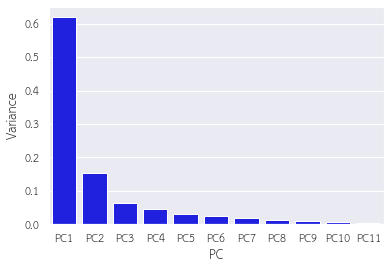

In [229]:
temp_df = pd.DataFrame({'Variance':pca11.explained_variance_ratio_,
                        'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']})
sns.barplot(x='PC',y="Variance", data=temp_df, color="blue")

In [230]:
sk_X_train_transformed  = pca11.transform(sk_scaled_X_train)

Text(0, 0.5, 'Second Principal Component')

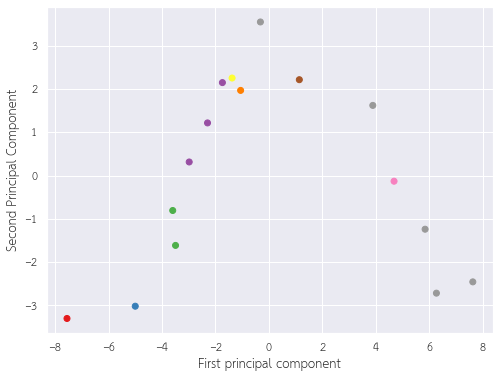

In [231]:
plt.figure(figsize=(8,6))
plt.scatter(sk_X_train_transformed[:,0],sk_X_train_transformed[:,1],c=y_train,cmap='Set1')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [232]:
sk_derived_X_train = pca11.inverse_transform(sk_X_train_transformed)
sk_derived_X_train - sk_scaled_X_train

array([[-6.59829210e-02,  4.18390452e-02, -2.31035310e-02,
         2.64503960e-03, -4.15636960e-02,  4.75947615e-02,
         4.08336192e-02, -3.40390976e-02,  1.03371255e-02,
         6.53052578e-02,  4.40217562e-02,  1.22224421e-02,
        -4.66255054e-02, -1.61761036e-02,  3.24314706e-02,
         4.13110120e-02, -1.18537276e-02, -7.73572593e-02,
         5.95638682e-02,  1.36977935e-02, -1.21536324e-01,
         1.31635669e-02,  2.44457011e-02,  4.02941427e-02,
        -3.02390861e-02, -5.67795756e-02,  3.64831225e-02,
        -6.04401827e-02, -8.19510816e-02,  8.18751141e-02],
       [-5.94070461e-02,  1.31719869e-01, -4.95471321e-02,
        -3.88699411e-02, -1.43269859e-01, -3.88655354e-02,
        -4.10381108e-03, -5.69020479e-02, -2.14933669e-02,
         1.28868729e-02,  2.22838402e-02, -5.25295540e-02,
        -3.63308512e-02, -2.72723573e-02,  4.46988558e-02,
        -4.12064334e-03,  6.06393055e-03, -4.36049407e-02,
         4.16645899e-02,  4.96752629e-02, -1.05070481e-

<AxesSubplot:>

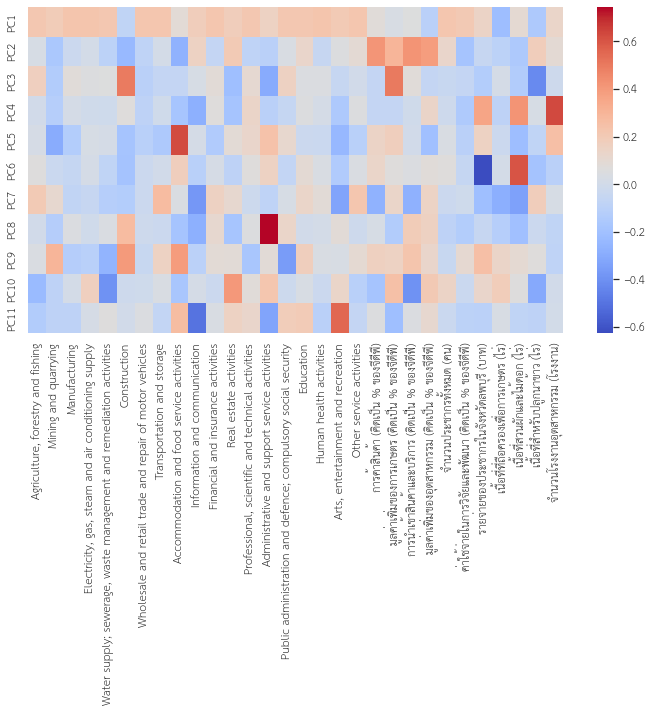

In [233]:
temp_df3 = pd.DataFrame(pca11.components_, columns=X.columns)
temp_df3.rename(index={0: "PC1", 1: "PC2", 2:"PC3", 3:"PC4", 4:"PC5", 5:"PC6", 6:"PC7", 7:"PC8", 8:"PC9", 9:"PC10", 10:"PC11"}, inplace=True)

plt.figure(figsize=(12,6))
sns.heatmap(temp_df3,cmap='coolwarm')